# Attribute Information
1. Age: age of the patient [years]
1. Sex: sex of the patient [M: Male, F: Female]
1. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
1. RestingBP: resting blood pressure [mm Hg]
1. Cholesterol: serum cholesterol [mm/dl]
1. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
1. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
1. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
1. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
1. Oldpeak: oldpeak = ST [Numeric value measured in depression]
1. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
1. HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
#Loading the dataset
heart_df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Preprocessing

In [5]:
#Checking for null values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#Checking for duplicated 
heart_df.duplicated().sum()

0

In [7]:
#Checking number of unique value in each feature
heart_df.nunique().sort_values(ascending=False)

Cholesterol       222
MaxHR             119
RestingBP          67
Oldpeak            53
Age                50
ChestPainType       4
RestingECG          3
ST_Slope            3
Sex                 2
FastingBS           2
ExerciseAngina      2
HeartDisease        2
dtype: int64

### Check and Separate Categorical Variables values

In [8]:
#Check values and their count in the columns
cat_col = []
for col in heart_df.select_dtypes(include= 'object' ).columns:
    if heart_df[col].nunique() < 8:  
        print(heart_df[col].value_counts())
        print('-'*90)
        cat_col.append(col)
        


M    725
F    193
Name: Sex, dtype: int64
------------------------------------------------------------------------------------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------------------------------------------------------------------------------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------------------------------------------------------------------------------------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------------------------------------------------------------------------------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------------------------------------------------------------------------------------------


### Convert (Replace) Categorical Variables to Numeric
*    Sex :  M = 0  , F = 1
*    ChestPainType : ATA = 0 , NAP = 1, ASY = 2,  TA = 3
*    RestingECG : Normal = 0 , ST = 1, LVH = 2
*    ExerciseAngina : N = 0 , Y = 1
*    ST_Slope : Up = 0, Flat = 1, Down = 2

In [9]:
for col in cat_col:
    print(col)
    print((heart_df[col].unique()),list(range(heart_df[col].nunique())))
    heart_df[col].replace((heart_df[col].unique()), range(heart_df[col].nunique()), inplace=True)
    print('-'*90)


Sex
['M' 'F'] [0, 1]
------------------------------------------------------------------------------------------
ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
------------------------------------------------------------------------------------------
RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
------------------------------------------------------------------------------------------
ExerciseAngina
['N' 'Y'] [0, 1]
------------------------------------------------------------------------------------------
ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
------------------------------------------------------------------------------------------


In [10]:
heart_df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

0 in cholesterol is wrong value

### Impute the 0 values (cholesterol) with KNN 

In [11]:
from sklearn.impute import KNNImputer
heart_df['Cholesterol'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd. DataFrame(after_impute, columns=heart_df.columns)

### Change columns type to int 

In [12]:
selected_Col = heart_df.columns
selected_Col = selected_Col.drop('Oldpeak')
heart_df[selected_Col] = heart_df[selected_Col].astype('int32')


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data, the correlation between the features, and the relationship between the features and the target variable(HeartDisease). I will start by looking at the distribution of the data, followed by relationship between the target variable and independent variables.

#### Find correlation between the variables and the target variable (HeartDisease)

<Axes: >

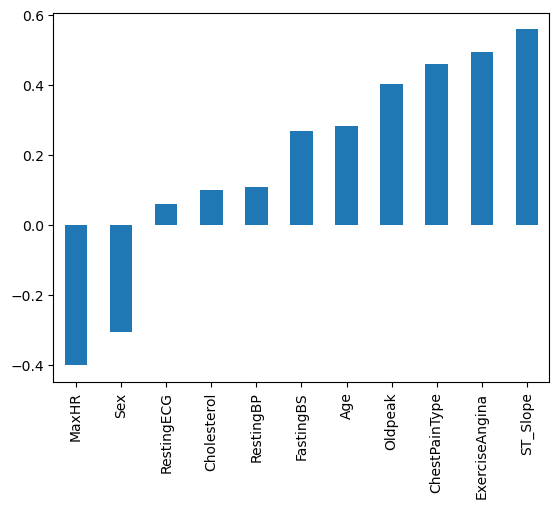

In [13]:
heart_df.corr()['HeartDisease'][:-1].sort_values().plot(kind='bar')

### HeartDisease Percentage

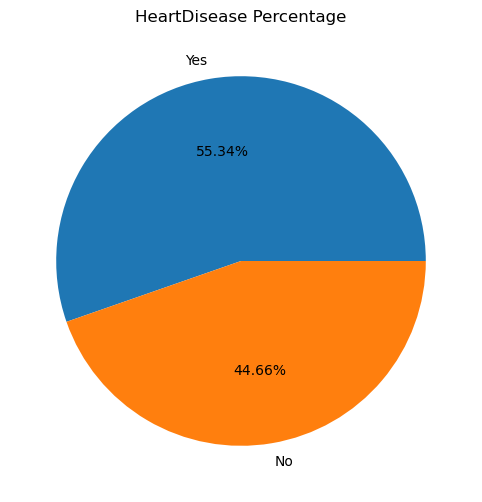

In [14]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6))
plt.pie(heart_df['HeartDisease'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('HeartDisease Percentage')
plt.show()

### Gender and Heart Disease

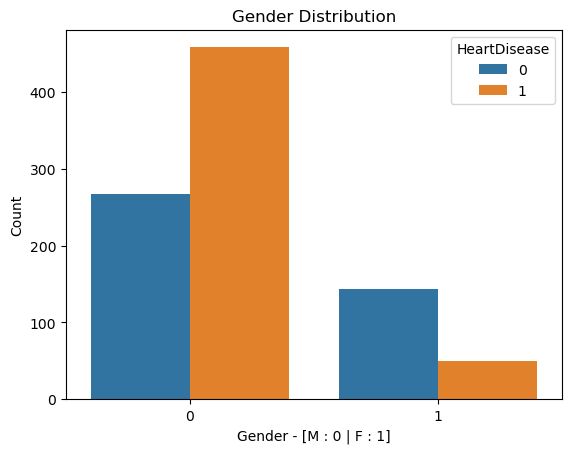

In [15]:
sns.countplot(x='Sex', data=heart_df, hue='HeartDisease')
plt.title('Gender Distribution')
plt.xlabel('Gender - [M : 0 | F : 1]')
plt.ylabel('Count')
plt.show()

Countplot shows strange relation between Gender and HeartDisease.Men have a higher risk of HeartDisease

### Age Distribution 

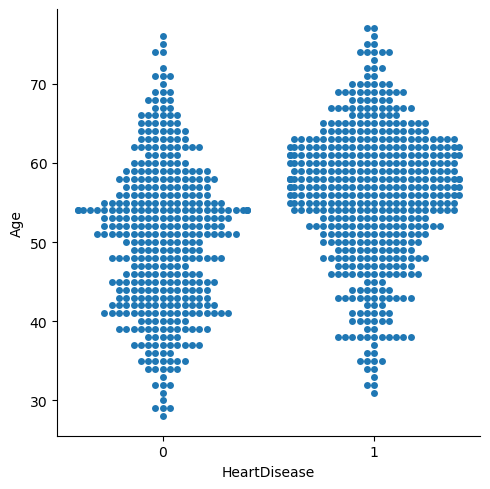

In [16]:
#catplot for age distribution
sns.catplot(x="HeartDisease", y="Age", kind="swarm", data=heart_df)


<Axes: xlabel='Age', ylabel='Count'>

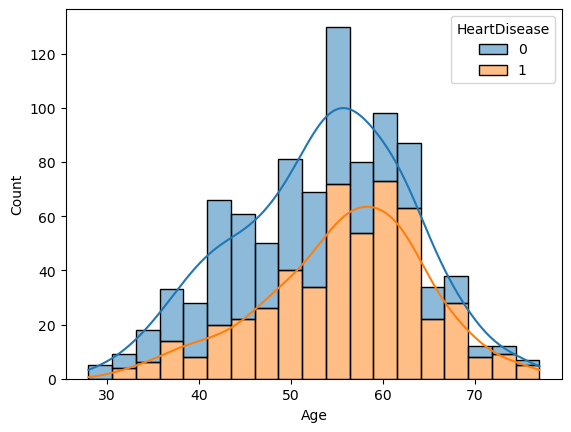

In [17]:
#histogram for age distribution
sns.histplot(data=heart_df, x="Age", hue="HeartDisease", multiple="stack",kde=True)

From graph and histplot, it is quite clear that majority of the patients are adult within the age group of 40-70 years. Patients in the age range 50-65 years are more prone to HeartDisease, as compared to other age groups. Since the number adults in the age group 50-65 years is more, the number of patients with HeartDiseases is also more as compared of other age groups.

### ChestPainType and Heart Disease

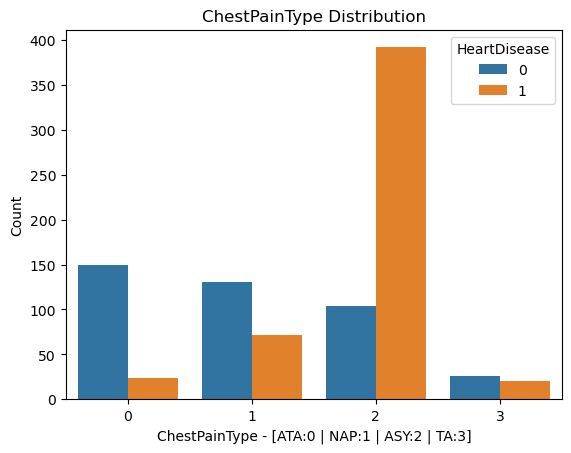

In [18]:
sns.countplot(x='ChestPainType', data=heart_df, hue='HeartDisease')
plt.title('ChestPainType Distribution')
plt.xlabel('ChestPainType - [ATA:0 | NAP:1 | ASY:2 | TA:3]')
plt.ylabel('Count')
plt.show()

Countplot shows asymptomatic's chest pain have a higher risk of HeartDisease

### FastingBS and Heart Disease

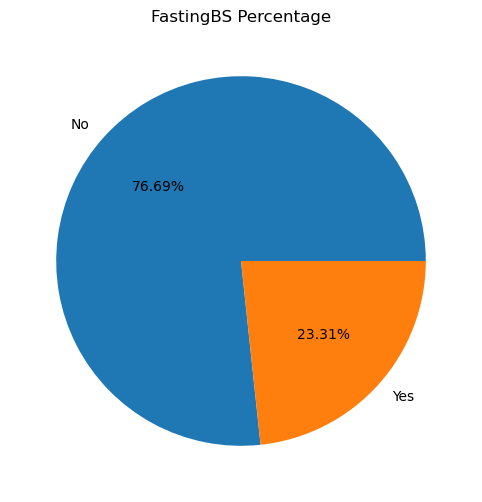

In [19]:
#Plot pie chart to show FastingBS Percentage
plt.figure(figsize=(10,6))
plt.pie(heart_df['FastingBS'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('FastingBS Percentage')
plt.show()

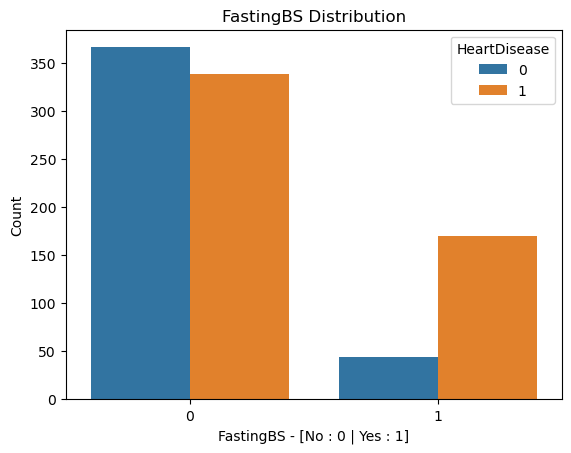

In [20]:
sns.countplot(x='FastingBS', data=heart_df, hue='HeartDisease')
plt.title('FastingBS Distribution')
plt.xlabel('FastingBS - [No : 0 | Yes : 1]')
plt.ylabel('Count')
plt.show()

Countplot shows FastingBS has high risk of HeartDisease

### Max heart rate and Heart Disease

Text(0.5, 1.0, 'MaxHR vs HeartDisease')

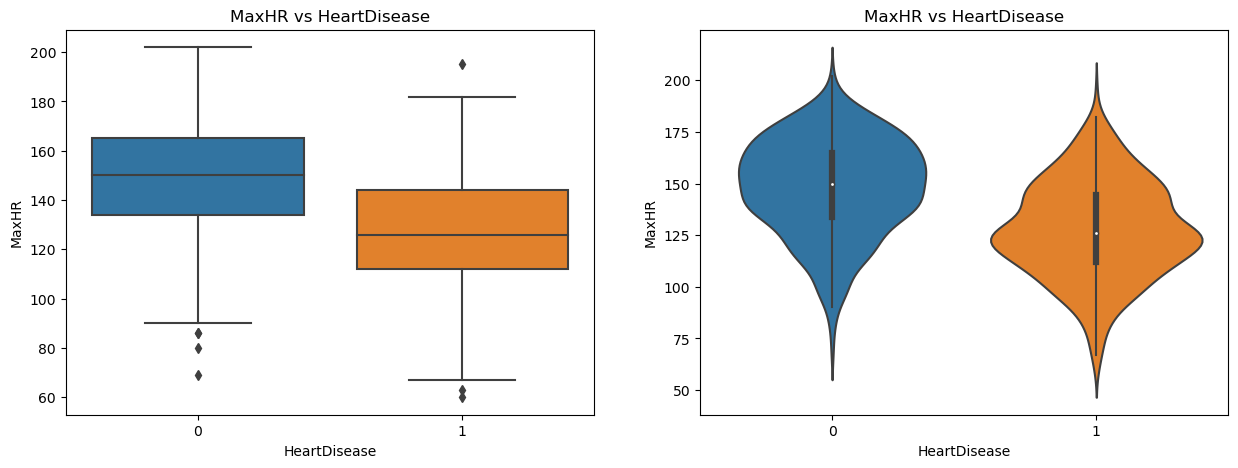

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=heart_df, ax=ax[0]).set_title('MaxHR vs HeartDisease')
sns.violinplot(x='HeartDisease', y='MaxHR', data=heart_df, ax=ax[1]).set_title('MaxHR vs HeartDisease')

Both boxplot and violinplot shows strange Inversely relation between the MaxHR and HeartDisease. According to the graphs the decreased value of Max HR highlights increased risk of Heart Disease. However in HeartDisease there is increased max heart rate at 100 and increased spread 120-130 as compared to non HeartDisease .

### Oldpeak and Heart Disease

Text(0.5, 1.0, 'Oldpeak vs HeartDisease')

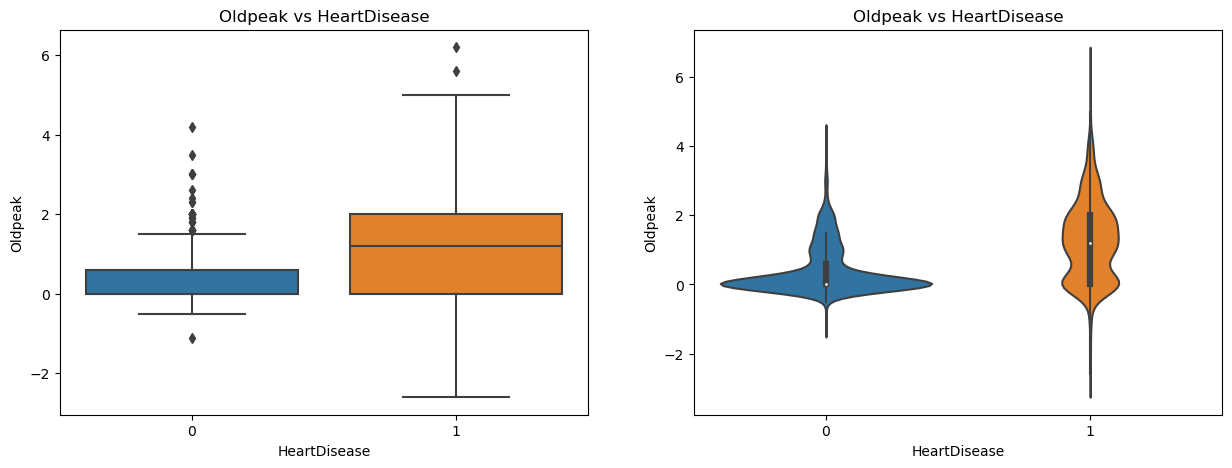

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=heart_df, ax=ax[0]).set_title('Oldpeak vs HeartDisease')
sns.violinplot(x='HeartDisease', y='Oldpeak', data=heart_df, ax=ax[1]).set_title('Oldpeak vs HeartDisease')

Both boxplot and violinplot shows strange relation between the depression and HeartDisease. According to the graphs the increased depression highlights increased risk of HeartDisease.


### Exercise-induced angina and Heart Disease

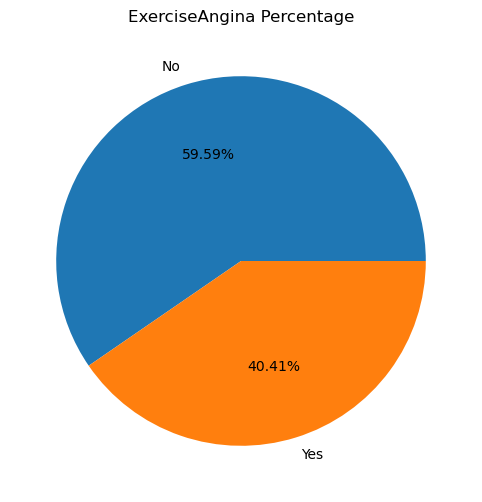

In [23]:
plt.figure(figsize=(10,6))
plt.pie(heart_df['ExerciseAngina'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('ExerciseAngina Percentage')
plt.show()

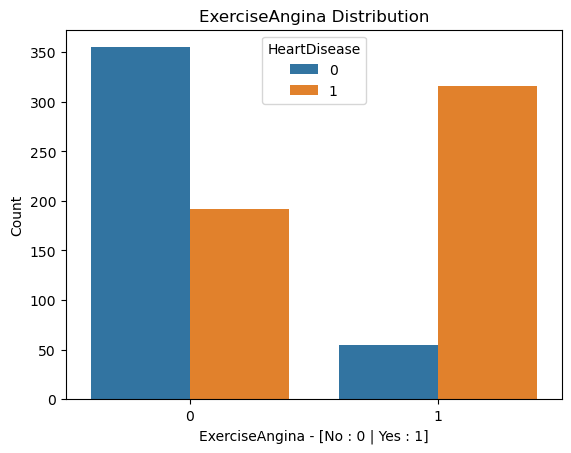

In [24]:
sns.countplot(x='ExerciseAngina', data=heart_df, hue='HeartDisease')
plt.title('ExerciseAngina Distribution')
plt.xlabel('ExerciseAngina - [No : 0 | Yes : 1]')
plt.ylabel('Count')
plt.show()

Countplot shows ExerciseAngina has high risk of HeartDisease


### ST_Slope and Heart Disease

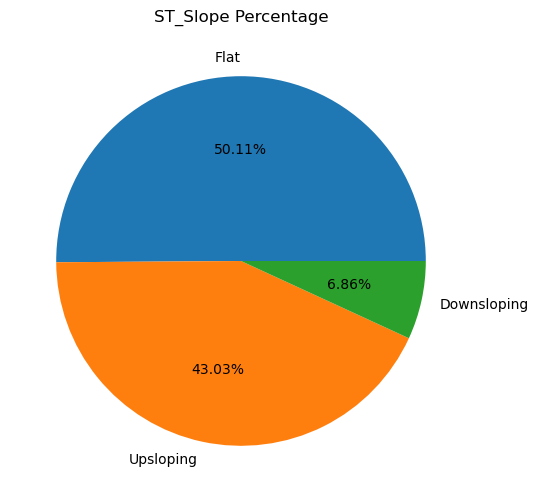

In [25]:
plt.figure(figsize=(10,6))
plt.pie(heart_df['ST_Slope'].value_counts(), labels=['Flat','Upsloping', 'Downsloping'], autopct='%1.2f%%')
plt.title('ST_Slope Percentage')
plt.show()

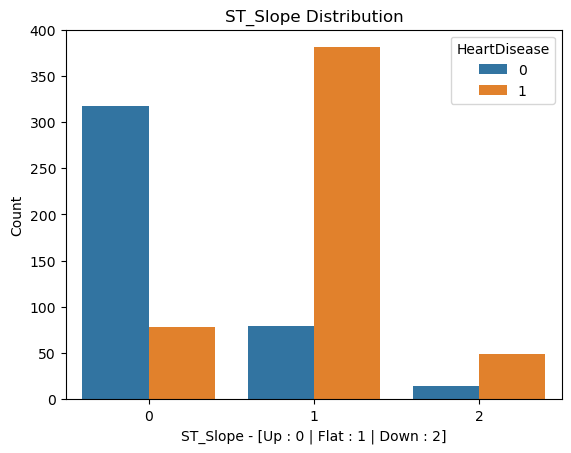

In [26]:
sns.countplot(x='ST_Slope', data=heart_df, hue='HeartDisease')
plt.title('ST_Slope Distribution')
plt.xlabel('ST_Slope - [Up : 0 | Flat : 1 | Down : 2]')
plt.ylabel('Count')
plt.show()

Countplot shows Flat Slope has high risk of HeartDisease


<Axes: >

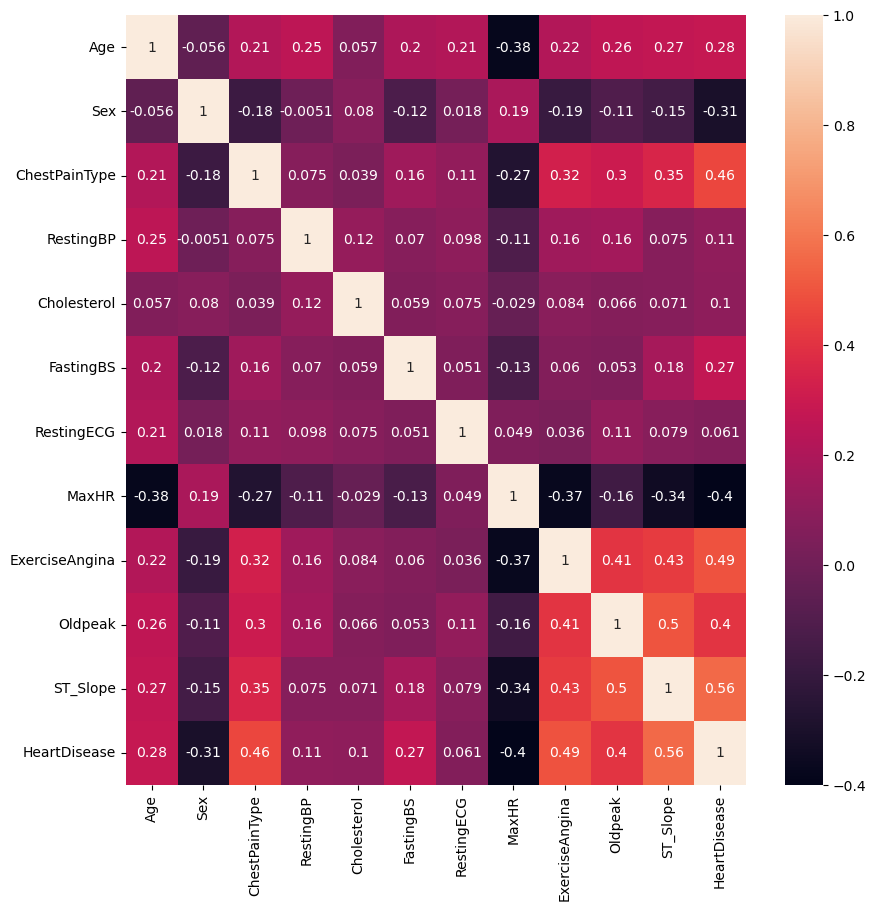

In [27]:
#plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), annot=True)

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('HeartDisease', axis=1), heart_df['HeartDisease'], test_size=0.2, random_state=42)

## Model Training

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_slover = ''
train_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(X_train, y_train)
    train_score[i] = lr.score(X_test, y_test)
    if lr.score(X_test, y_test) == train_score.max():
        best_slover = n

lr = LogisticRegression(solver=best_slover)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

LogisticRegression Score: 0.8206521739130435


### Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(X_train, y_train) 
    yhat = svm.predict(X_test)
    kernels[i]=f1_score(y_test, yhat, average="weighted")
    if kernels[i] == max(kernels.values()):
        best = i
svm = SVC(kernel=best)
svm.fit(X_train, y_train) 
svm_pred = svm.predict(X_test)
print(f'SVM f1_score kernel({best}): {f1_score(y_test, svm_pred, average="weighted")}')


SVM f1_score kernel(linear): 0.8422427751012774


### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees's Accuracy:  0.8369565217391305


### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

best_K = mean_acc.argmax()+1
knn = KNeighborsClassifier(n_neighbors = best_K).fit(X_train,y_train)
knn_pred=neigh.predict(X_test)
print( "The best accuracy was ", accuracy_score(y_test, knn_pred), "with k=", mean_acc.argmax()+1) 


The best accuracy was  0.6358695652173914 with k= 15


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(X_train, y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(X_train, y_train)
rfc_pred = rfctree.predict(X_test)
print("RandomForestClassifier's Accuracy: ", accuracy_score(y_test, rfc_pred))

RandomForestClassifier's Accuracy:  0.8315217391304348


## Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix

def print_score(test, pred, model):
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    sns.heatmap(confusion_matrix(test, pred), annot=True, cmap='Blues', ax=ax[0])
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    ax = sns.distplot(test, color='r',  label='Actual Value',hist=False)
    sns.distplot(pred, color='b', label='Predicted Value',hist=False,ax=ax)
    plt.title(f'Actual vs Predicted Value {model}')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.show()
    Metrics = {'Metrics':['Accuracy Score', 'f1 Score', 'Mean Absolute Error ','Mean Squared Error', 'R2 Score'],
               'Score' : [accuracy_score(test, pred), f1_score(test, pred, average="weighted"),
                          mean_absolute_error(test, pred),mean_squared_error(test, pred),r2_score(test, pred)]}
    df = pd.DataFrame(Metrics)
    return df

### Evaluating Logistic Regression Model

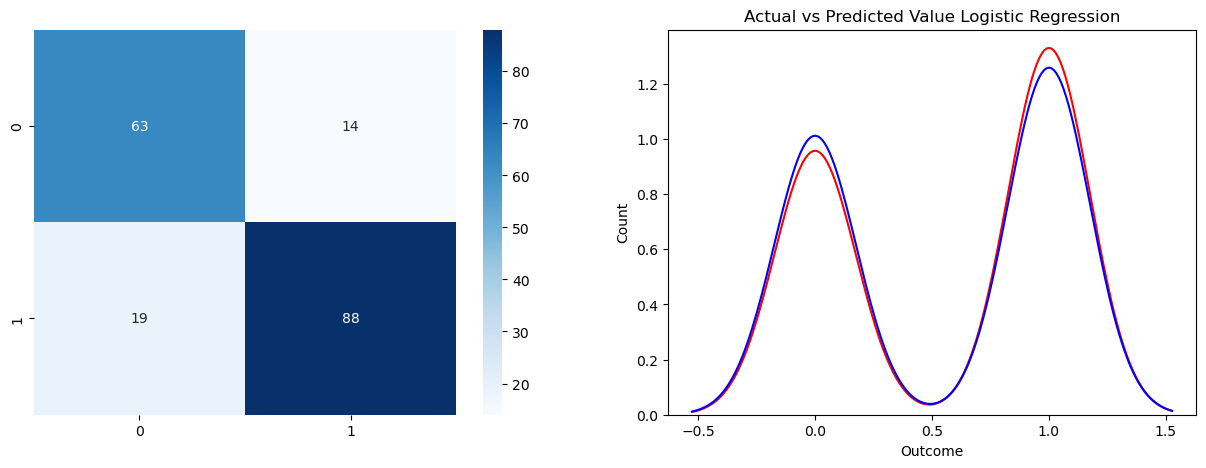

,Metrics,Score
0,Accuracy Score,0.820652
1,f1 Score,0.821327
2,Mean Absolute Error,0.179348
3,Mean Squared Error,0.179348
4,R2 Score,0.263017


In [35]:
print_score(y_test, lr_pred, 'Logistic Regression')

### Evaluating SVM Model

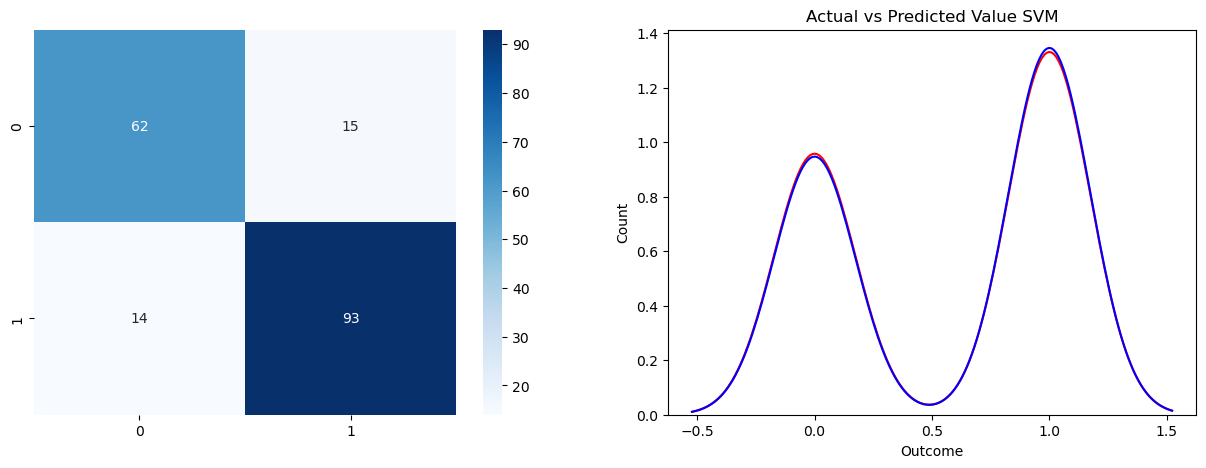

,Metrics,Score
0,Accuracy Score,0.842391
1,f1 Score,0.842243
2,Mean Absolute Error,0.157609
3,Mean Squared Error,0.157609
4,R2 Score,0.352349


In [36]:
print_score(y_test, svm_pred, 'SVM')

### Evaluating DecisionTree Model

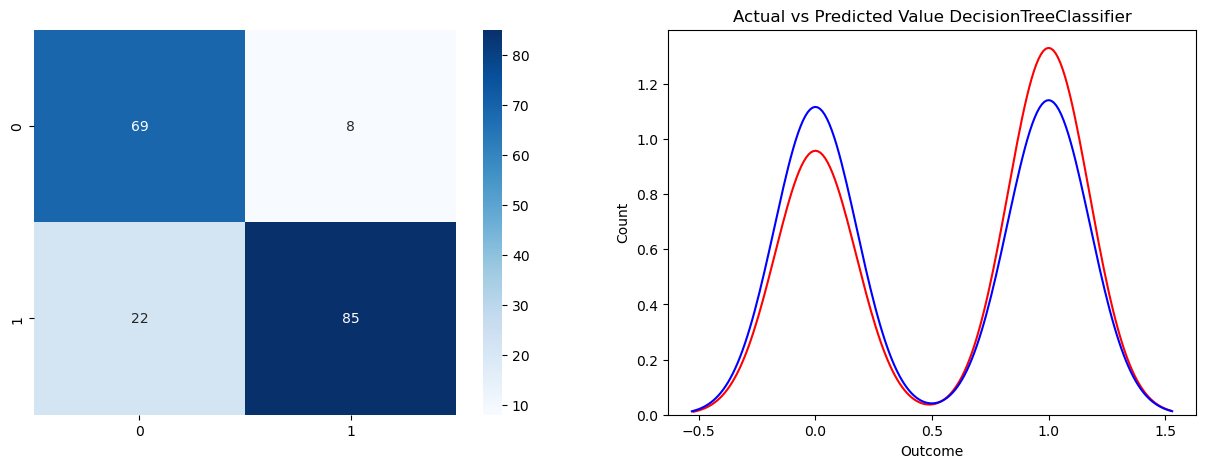

,Metrics,Score
0,Accuracy Score,0.836957
1,f1 Score,0.838043
2,Mean Absolute Error,0.163043
3,Mean Squared Error,0.163043
4,R2 Score,0.330016


In [37]:
print_score(y_test, dtc_pred,'DecisionTreeClassifier')

### Evaluating KNN Model

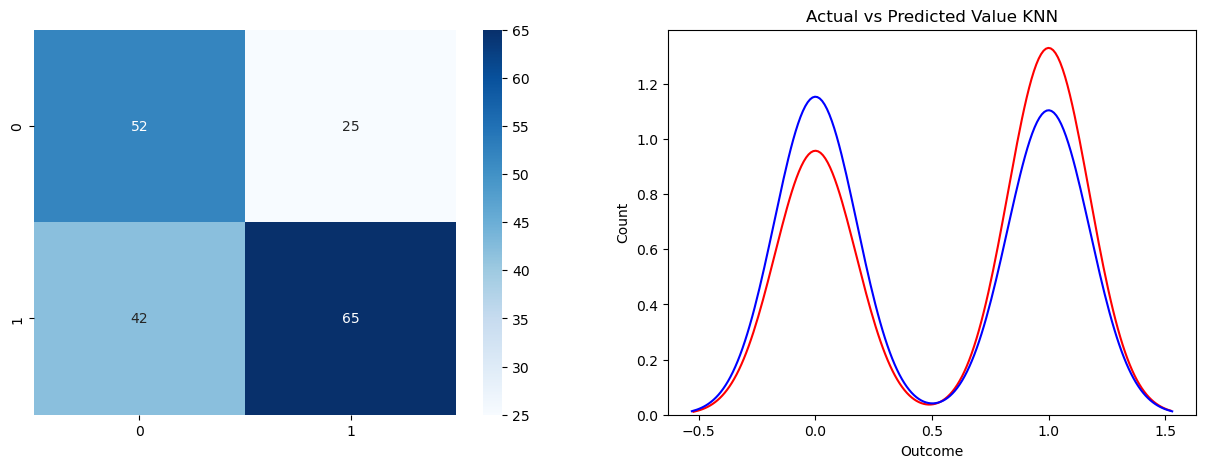

,Metrics,Score
0,Accuracy Score,0.635870
1,f1 Score,0.638258
2,Mean Absolute Error,0.364130
3,Mean Squared Error,0.364130
4,R2 Score,-0.496298


In [38]:
print_score(y_test, knn_pred, 'KNN')

### Evaluating RandomForestClassifier Model

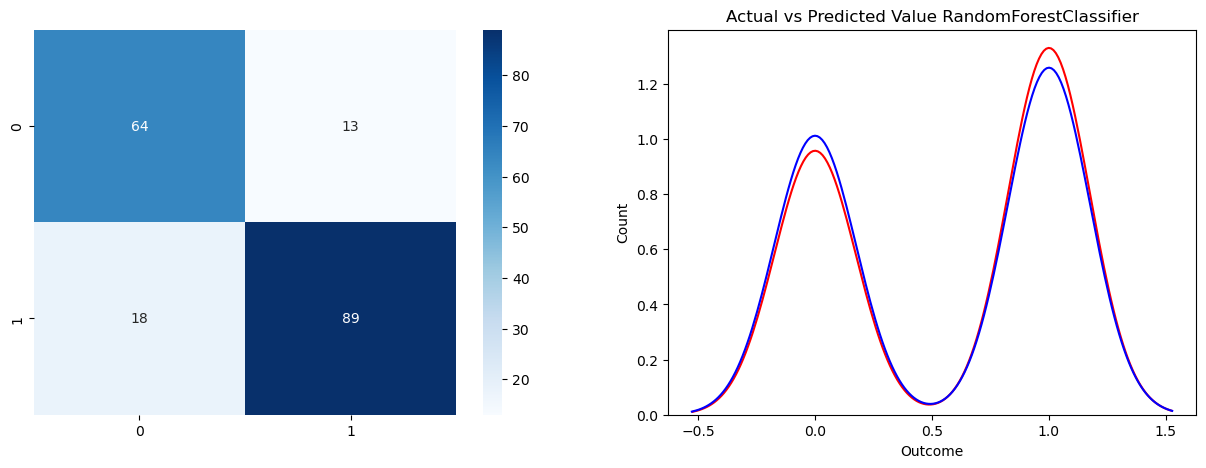

,Metrics,Score
0,Accuracy Score,0.831522
1,f1 Score,0.832155
2,Mean Absolute Error,0.168478
3,Mean Squared Error,0.168478
4,R2 Score,0.307683


In [39]:
print_score(y_test, rfc_pred, 'RandomForestClassifier')

## Comparing the models

Text(0.5, 1.0, 'Comparison of different models')

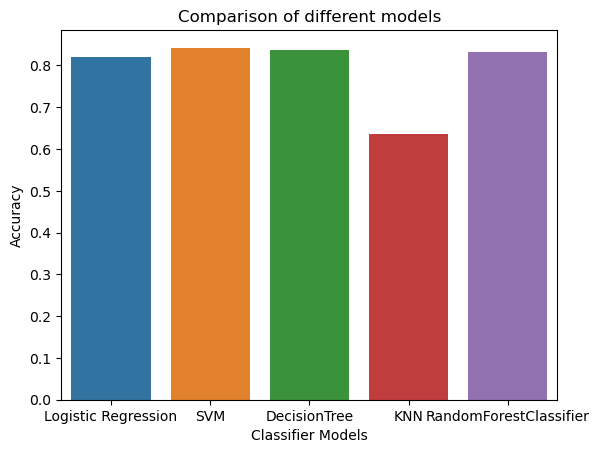

In [40]:
#comparing the accuracy of different models
models = ['Logistic Regression','SVM','DecisionTree','KNN', 'RandomForestClassifier']
preds = [lr_pred,svm_pred,dtc_pred,knn_pred,rfc_pred]
accuracys= []
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
sns.barplot(x=models, y=accuracys)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

## Conclusion

From the exploratory data analysis, I have concluded that the risk of Heart Disease depends upon the following factors:
* MaxHR
* Oldpeak
* ChestPainType
* ExerciseAngina
* ST_Slope


The SVM model performed better than other models with an accuracy of 84% . The accuracy of the model can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 918 rows.